# One thing you might not have known about linear regression

## Setup

In [1]:
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [14, 8]

In [2]:
%config InlineBackend.figure_format = 'retina'

## Data

In [3]:
df = sns.load_dataset("flights")
df["report_date"] = df.apply(lambda x: datetime.strptime(f"{x['year']}-{x['month']}", '%Y-%b').date(), axis=1)
df = df.set_index("report_date").loc[:, ["passengers"]]
df.head()

,passengers
report_date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


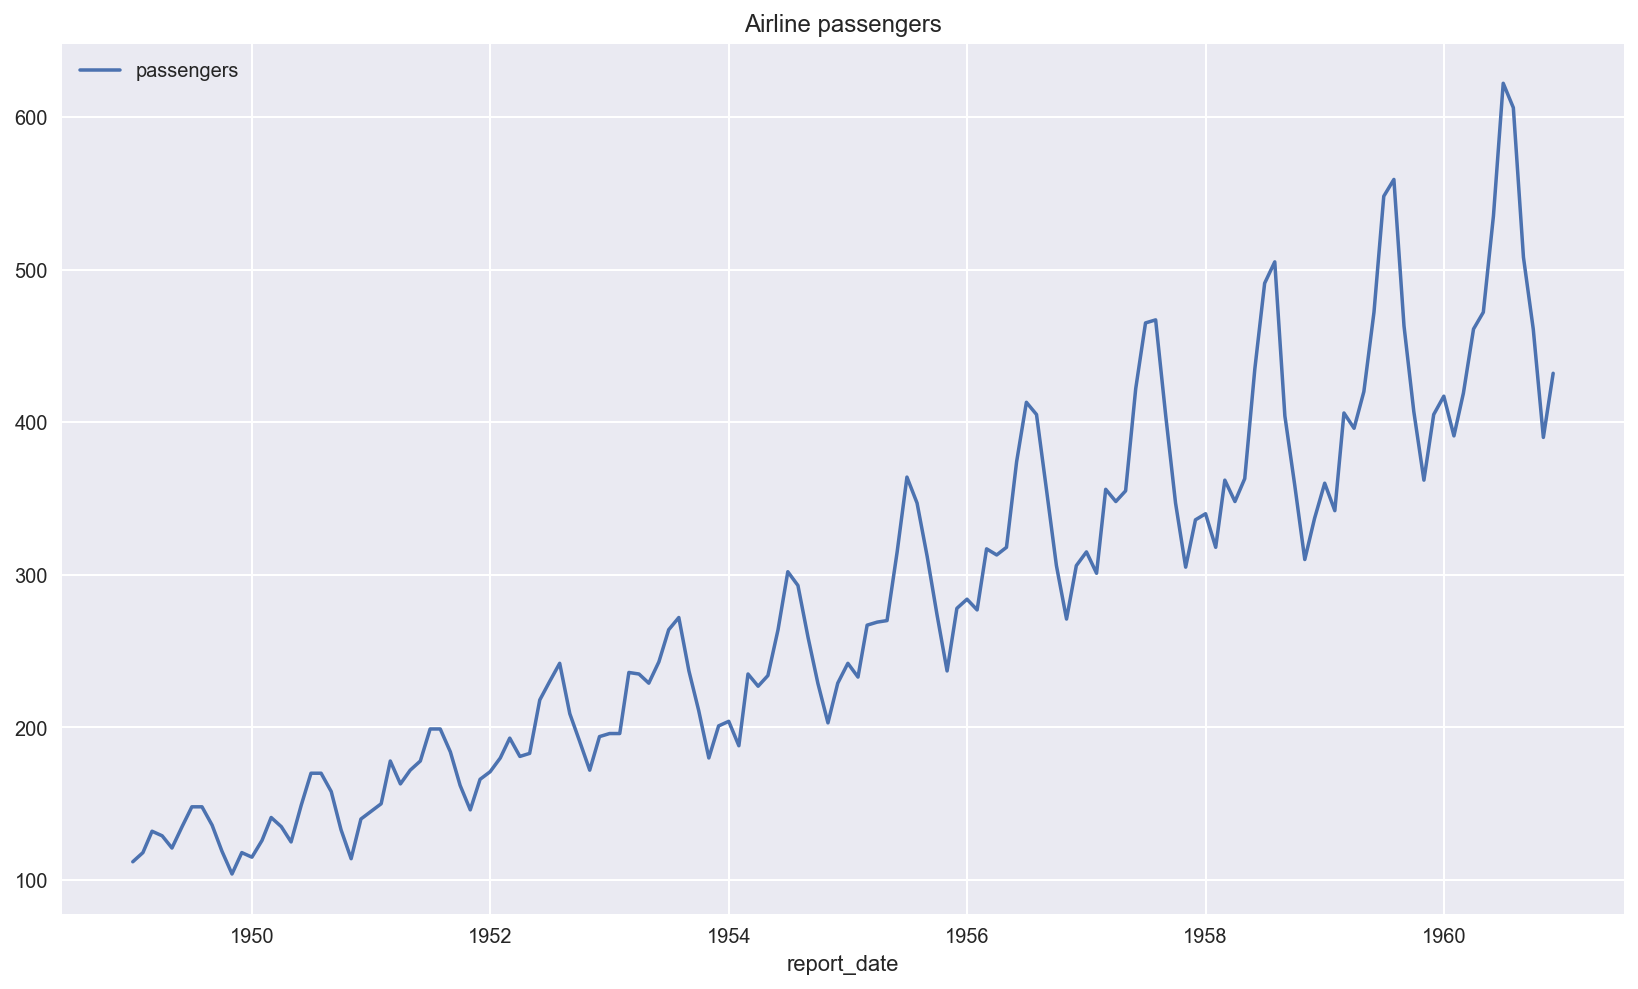

In [4]:
df.plot(title="Airline passengers");

In [5]:
df

,passengers
report_date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


## Analysis

In [6]:
# create lags (features) and leads (targets)
for lag in range(1, 13):
    df[f"lag_{lag}"] = df["passengers"].shift(lag)

for lead in range(1, 3):
    df[f"lead_{lead}"] = df["passengers"].shift(-lead)

df

,passengers,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lead_1,lead_2
report_date,,,,,,,,,,,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118.0,132.0
1949-02-01,118,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132.0,129.0
1949-03-01,132,118.0,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129.0,121.0
1949-04-01,129,132.0,118.0,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.0,135.0
1949-05-01,121,129.0,132.0,118.0,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135.0,148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,606,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0,407.0,463.0,559.0,508.0,461.0
1960-09-01,508,606.0,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0,407.0,463.0,461.0,390.0
1960-10-01,461,508.0,606.0,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0,407.0,390.0,432.0


In [7]:
# drop missing values
df = df.dropna()

# create X and y frames
X = df[[col for col in df.columns if "lag" in col]]
y = df[["passengers", "lead_1", "lead_2"]]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=False)


In [8]:
X_train

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
report_date,,,,,,,,,,,,
1950-01-01,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0,118.0,112.0
1950-02-01,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0,118.0
1950-03-01,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0
1950-04-01,141.0,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0
1950-05-01,135.0,141.0,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1958-04-01,362.0,318.0,340.0,336.0,305.0,347.0,404.0,467.0,465.0,422.0,355.0,348.0
1958-05-01,348.0,362.0,318.0,340.0,336.0,305.0,347.0,404.0,467.0,465.0,422.0,355.0
1958-06-01,363.0,348.0,362.0,318.0,340.0,336.0,305.0,347.0,404.0,467.0,465.0,422.0


In [9]:
y_train

,passengers,lead_1,lead_2
report_date,,,
1950-01-01,115,126.0,141.0
1950-02-01,126,141.0,135.0
1950-03-01,141,135.0,125.0
1950-04-01,135,125.0,149.0
1950-05-01,125,149.0,170.0
...,...,...,...
1958-04-01,348,363.0,435.0
1958-05-01,363,435.0,491.0
1958-06-01,435,491.0,505.0


In [10]:
# fit a linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# create predictions
y_pred = pd.DataFrame(reg.predict(X_test), index=X_test.index)



In [11]:
def plot_multistep_forecast(y, title, freq):
    """
    Plot multistep forecast based on the output DF.
    """
    fig, ax = plt.subplots()
    for date, fcst in y.iterrows():
        fcst.index = pd.period_range(start=date, periods=len(fcst), freq=freq)
        fcst.plot(ax=ax)
    ax.set_title(title)
    return ax

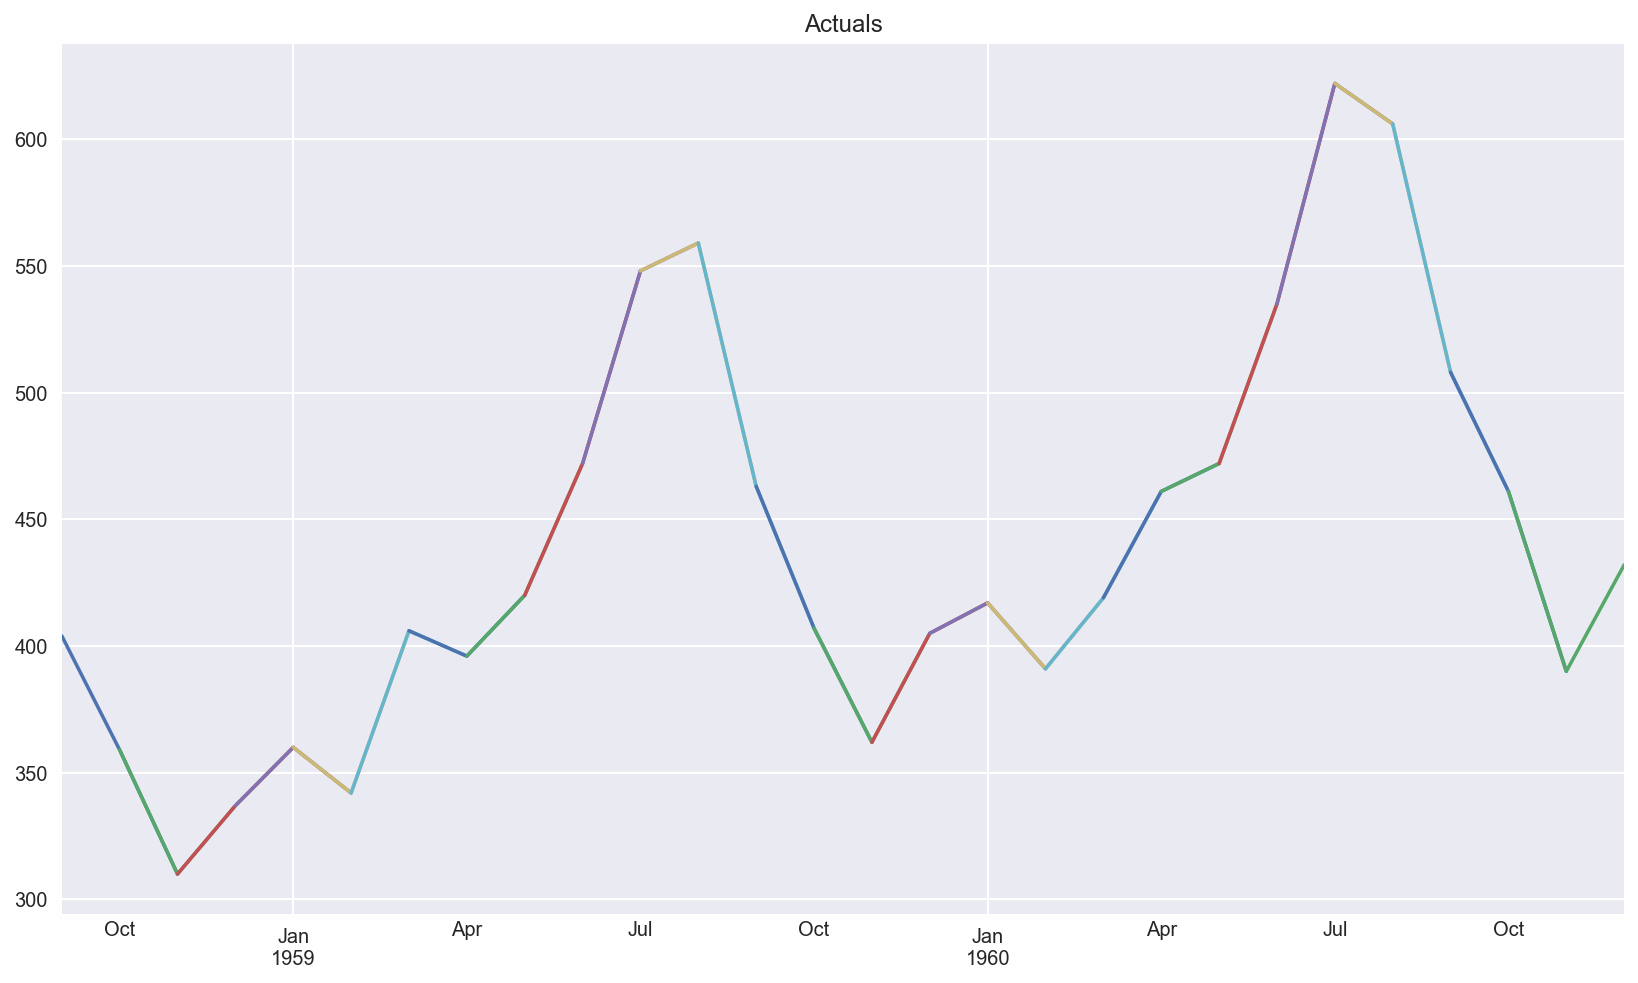

In [12]:
plot_multistep_forecast(y_test, "Actuals", freq="M");

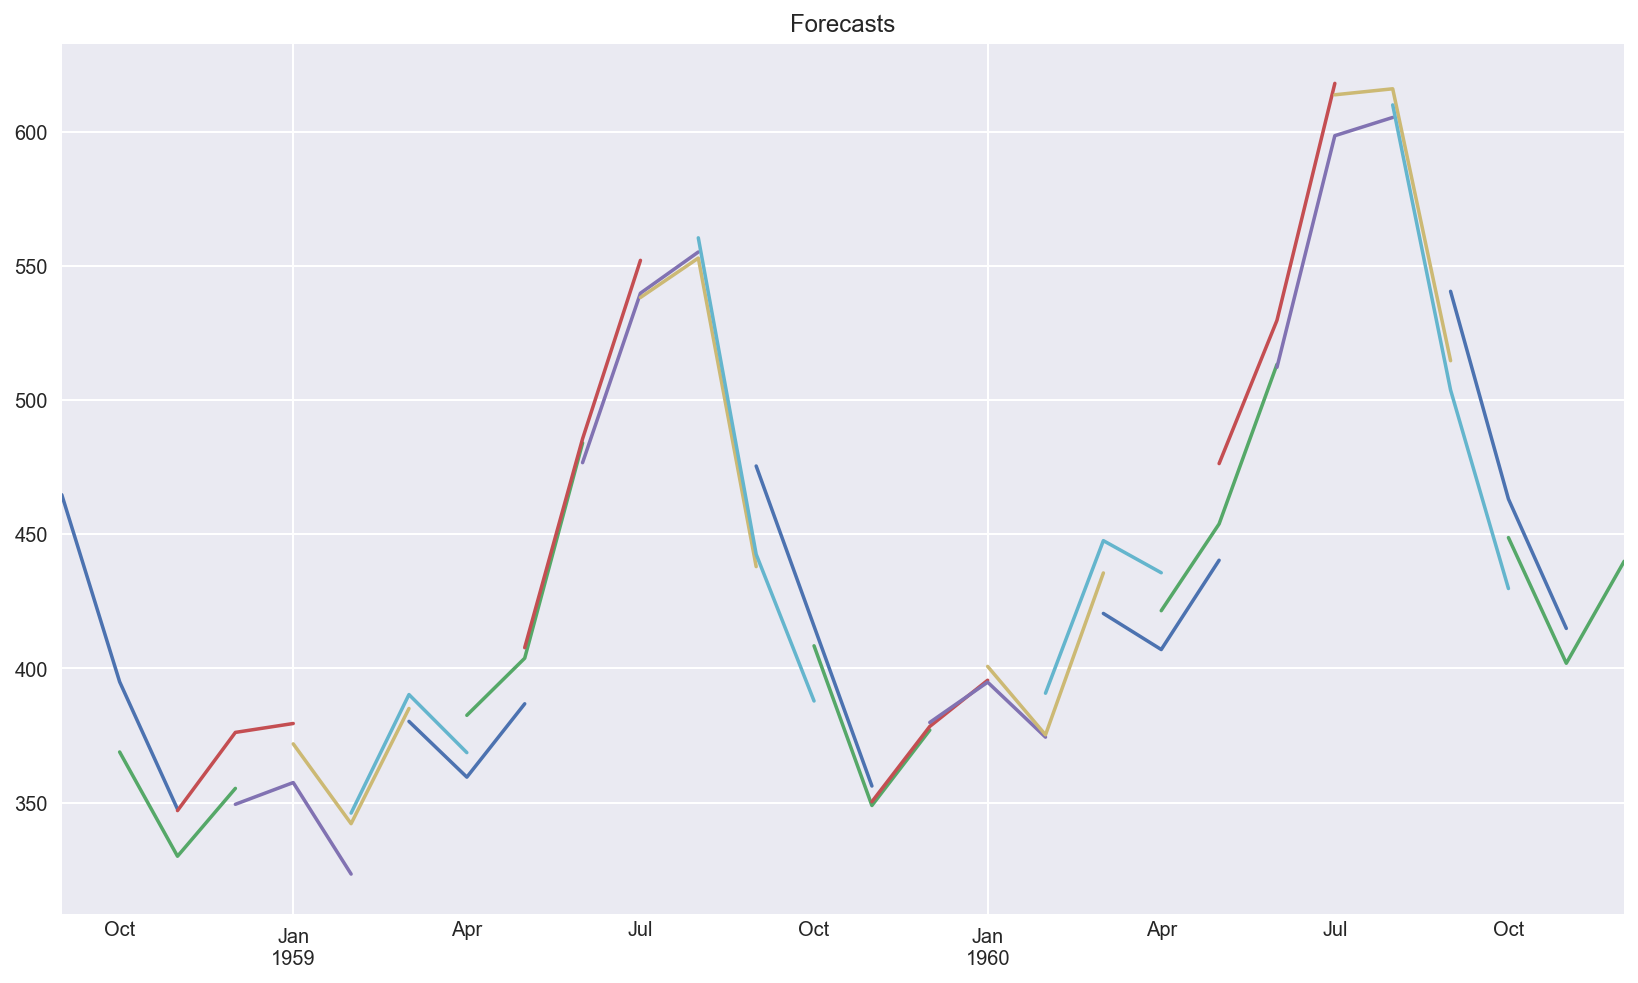

In [13]:
plot_multistep_forecast(y_pred, "Forecasts", freq="M");